# Descripció

<span style="color: blue;">Aquest és un exercici pràctic per aprendre a extreure dades fent servir Python, ja sigui des d'una API pública o mitjançant tècniques de Web Scraping. Pots triar lliurement l'API amb què treballaràs, així com la pàgina web</span>

## <span style="color: #FF1493; font-size: 30px;">Exercici 1. Consumir una API</span>

<span style="color: blue;">Selecciona una API pública i extreu dades utilitzant Python.</span>

Primer faig **pip install requests** per instalar la llibreria de python que em permet consumir d'APIs de webs

Selecciono la API pública del INE https://datos.gob.es/es/apidata#!/NTI_primary_sector_taxonomy/findAllPublicSector

In [37]:
import requests
import pandas as pd
print('librería de requests a API cargada con éxito')

librería de requests a API cargada con éxito


Ara aplico el mètodo get() de la llibreria requests para consumir una API del INE mitjançant Python , i en aquest cas com que la solicitud ha estat exitosa, m'imprimarà la informació en un format json

In [38]:
URL="https://datos.gob.es/apidata/catalog/dataset"

response = requests.get(URL)

if response.status_code == 200:
    print('Solicitud exitosa')
    Data_json=response.json()
    print('Data_json:', Data_json)
else:
    print('Error en la solicitud, detalles:', response.text)

Solicitud exitosa
Data_json: {'format': 'linked-data-api', 'version': '0.2', 'result': {'_about': 'http://datos.gob.es/apidata/catalog/dataset.json', 'definition': 'http://datos.gob.es/apidata/catalog/meta/dataset.json', 'extendedMetadataVersion': 'http://datos.gob.es/apidata/catalog/dataset.json?_metadata=all', 'first': 'http://datos.gob.es/apidata/catalog/dataset.json?_page=0', 'hasPart': 'http://datos.gob.es/apidata/catalog/dataset.json', 'isPartOf': 'http://datos.gob.es/apidata/catalog/dataset.json', 'items': [{'_about': 'https://datos.gob.es/catalogo/a05003423-clasificacion-de-establecimientos-de-restauracion-istac-cl_cnae_2009_restauracion', 'description': [{'_value': 'Clasificación que recoge los diferentes tipos de establecimientos de restauración. Esta basada en la CNAE 2009 y recoge aquellas actividades relacionadas con la prestación de servicios de restauración en las Islas Canarias. Además, recoge aquellos establecimientos de restauración encontrados en los decretos DECRETO

In [39]:
len(Data_json)

3

El json es un diccionari de diccionaris. En aquest cas té tres elements, on el tercer element és un diccionari. Imprimiré els dos primers valors i després del tercer diccionari, que veig que té com a clau 'result', m'imprimiré els seus valors.

In [40]:
i=0
for key in Data_json.keys():
    print(Data_json[key])
    i+=1
    if i==2:
        break
result=Data_json['result']

print("Impresión de los valores del diccionario resultados")
for key in result.keys():
    print(result[key])
       

linked-data-api
0.2
Impresión de los valores del diccionario resultados
http://datos.gob.es/apidata/catalog/dataset.json
http://datos.gob.es/apidata/catalog/meta/dataset.json
http://datos.gob.es/apidata/catalog/dataset.json?_metadata=all
http://datos.gob.es/apidata/catalog/dataset.json?_page=0
http://datos.gob.es/apidata/catalog/dataset.json
http://datos.gob.es/apidata/catalog/dataset.json
[{'_about': 'https://datos.gob.es/catalogo/a05003423-clasificacion-de-establecimientos-de-restauracion-istac-cl_cnae_2009_restauracion', 'description': [{'_value': 'Clasificación que recoge los diferentes tipos de establecimientos de restauración. Esta basada en la CNAE 2009 y recoge aquellas actividades relacionadas con la prestación de servicios de restauración en las Islas Canarias. Además, recoge aquellos establecimientos de restauración encontrados en los decretos DECRETO 90/2010, de 22 de julio, por el que se regula la actividad turística de restauración y los establecimientos donde se desarrol

In [41]:
URL="http://datos.gob.es/apidata/catalog/dataset.json?_metadata=all"

response = requests.get(URL)
headers=response.headers
print(headers)


{'Server': 'nginx', 'Date': 'Fri, 18 Oct 2024 00:23:23 GMT', 'Content-Type': 'application/json', 'Content-Length': '76677', 'Connection': 'keep-alive', 'Access-Control-Allow-Origin': '*', 'Content-Location': 'http://datos.gob.es/apidata/catalog/dataset.json?_metadata=all', 'Age': '121', 'X-Frame-Options': 'SAMEORIGIN', 'X-Content-Type-Options': 'nosniff', 'X-XSS-Protection': '1; mode=block', 'Accept-Ranges': 'bytes'}


Ara he obtingut d'una altra url del ine, les capceleres de l'extracció a través d'una de les propietats del object, que són els detalls tècnics de la informació, pero no té res a veure amb el contingut de response, únicament amb els detalls tècnics de la sol·licitud. Al ser un diccionari, ho imprimeixo per tal que es vegi millor.

In [42]:
for key,value in headers.items():
    print(key,":",value)
    

Server : nginx
Date : Fri, 18 Oct 2024 00:23:23 GMT
Content-Type : application/json
Content-Length : 76677
Connection : keep-alive
Access-Control-Allow-Origin : *
Content-Location : http://datos.gob.es/apidata/catalog/dataset.json?_metadata=all
Age : 121
X-Frame-Options : SAMEORIGIN
X-Content-Type-Options : nosniff
X-XSS-Protection : 1; mode=block
Accept-Ranges : bytes


In [43]:
print(response.url)

https://datos.gob.es/apidata/catalog/dataset.json?_metadata=all


Amb la propietat url, puc recuperar la url que està dins de la variable response. I en principi deixarem l'exercici per contestat

## <span style="color: #FF1493; font-size: 30px;">Exercici 2. Obtenir dades amb Web Scraping</span>

.<span style="color: blue;">Selecciona un lloc web i extreu dades utilitzant la tècnica de Web Scraping a Python.</span>

Escolliré la web de la https://www.cdlibre.org doncs analitzant https://www.cdlibre.org/robots.txt  veig que em deixa fer Web scrapping en totes les rutes excepte les
direccions del tipus /boletin/bol_.

User-agent: *

**Disallow: /boletin/bol_**

Escolliré la ruta de la imatge de continuació, ja que aquí es veu un inventari de 5 jocs d'escacs que hauré d'intentar scrapejar.

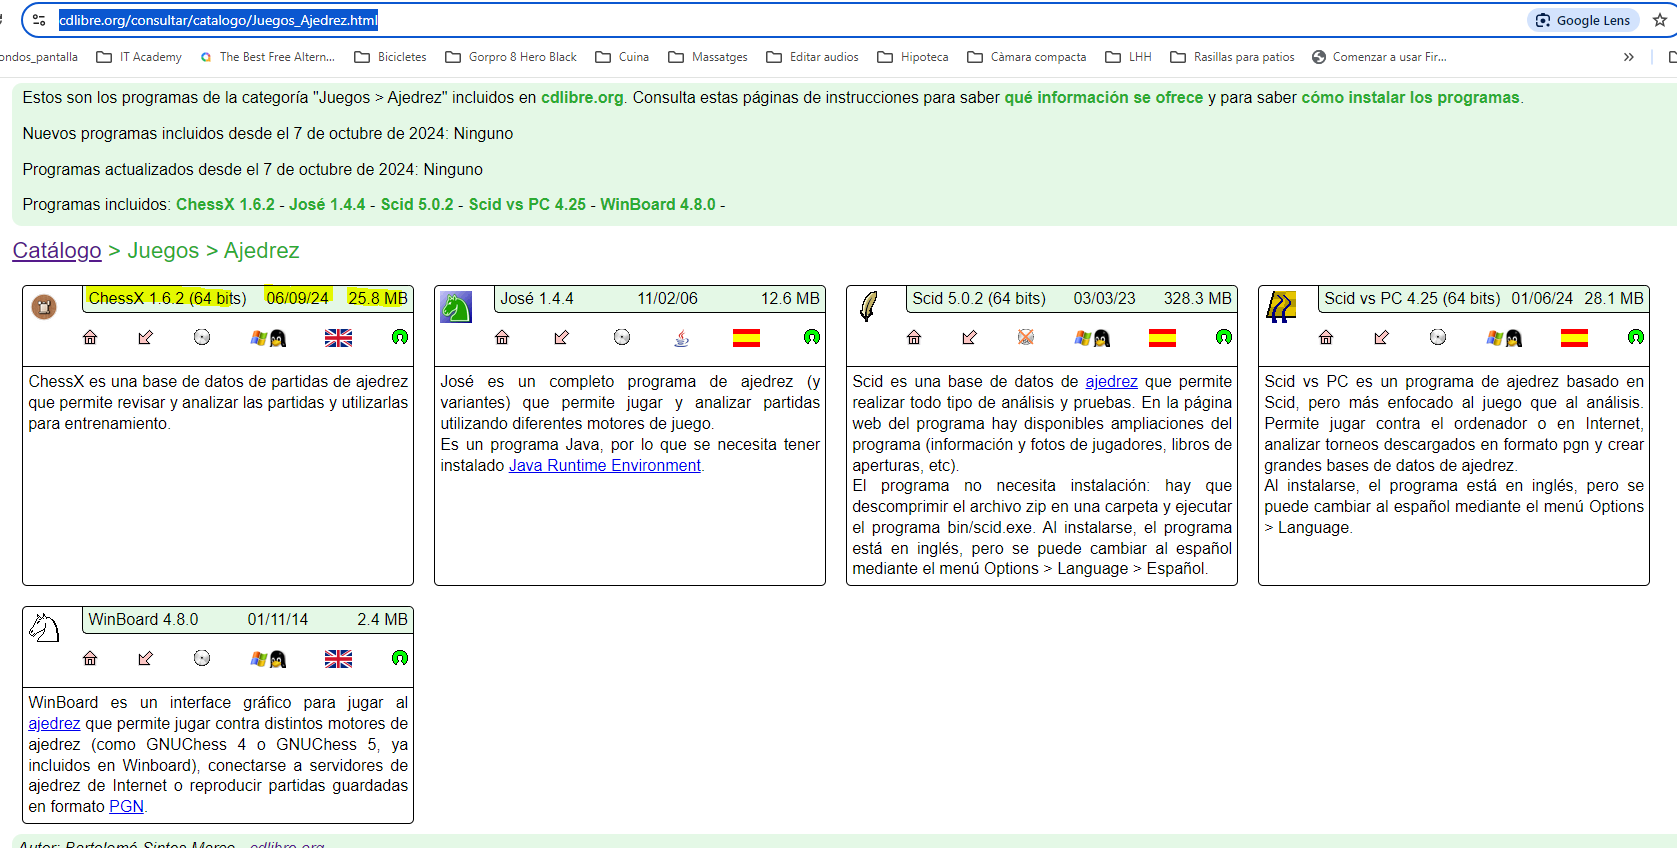

L'objectiu és a través de Web scraping aconseguir un DataFrame de pandas, a on obtingui per tres columnes, **el Nombre, la Fecha y el Tamaño** de cada un dels 5 jocs d'escacs de la web.

In [44]:
import requests

URL = "https://www.cdlibre.org/consultar/catalogo/Juegos_Ajedrez.html"
page = requests.get(URL)

print(page.text)
#print(page.prettify())

<!DOCTYPE html>
<html lang="es">
  <head>
    <meta charset="utf-8">
    <title>Catálogo &gt; Juegos &gt; Ajedrez. cdlibre.org</title>
    <meta name="viewport" content="width=device-width, initial-scale=1.0">
    <link rel="stylesheet" type="text/css" href="../../varios/estilo.css">
    <link rel="shortcut icon" href="../../varios/favicon.ico">
  </head>

  <body>
    <header>
      <p id="logo">
        <a href="https://www.cdlibre.org/"><img src="../../img/cdlibre_logo.png" alt="cdlibre.org"></a>
      </p>

      <h1>Catálogo de Software Libre</h1>

      <nav>
        <ul>
          <li><a href="../../index.html">Inicio</a></li>
          <li class="activelink"><a href="index.html">Catálogo</a></li>
          <li><a href="../../boletin/index.html">Boletín</a></li>
          <li><a href="../../descargar/index.html">Recopilaciones</a></li>
        </ul>
      </nav>
    </header>

    <main>
      <article>
        <section>
          <p>Estos son los programas de la categoría "Jueg

Faig al terminal python faig **pip install beautifulsoup4**

In [45]:
from bs4 import BeautifulSoup
print("La llibreria BeautifulSopu s'ha carregat amb èxit")

La llibreria BeautifulSopu s'ha carregat amb èxit


In [46]:
soup = BeautifulSoup(page.content, "html.parser")
programas = soup.find_all("div", class_="programa")
#print(programas.prettify())

Ara al estar al inici de la classe programa, puc recorrer tots els elements posteriors i filtrar pels 3 registres que m'interessen.

In [47]:
for element in programas:
    print(element, end="\n"*2)

<div class="programa" id="d0">
<div class="ficha">
<span class="ico"><img alt="ChessX 1.6.2" height="32" src="iconos/chessx.png" title="ChessX 1.6.2" width="32"/></span>
<div class="filas">
<p class="fila1">
<span class="nom">ChessX 1.6.2 (64 bits)</span>
<span class="fec">06/09/24</span>
<span class="tam">25.8 MB</span>
</p>
<p class="fila2">
<span class="enl"><a href="https://chessx.sourceforge.io/"><img alt="Homepage" height="16" src="wwwhome.png" title="Homepage" width="16"/></a></span>
<span class="enl"><a href="https://sourceforge.net/projects/chessx/files/chessx/1.6.2/setup-chessx7-64.exe/download"><img alt="Descargar de Internet" height="16" src="descarga.png" title="Descargar de Internet" width="16"/></a></span>
<span class="enl"><img alt="Incluido en DVD-Juegos" height="16" src="iso.png" title="Incluido en DVD-Juegos" width="16"/></span>
<span class="so"><img alt="Windows y Linux" height="18" src="winlin.png" title="Windows y Linux" width="36"/></span>
<span class="idi"><img 

In [48]:
#Creo un diccionario, cuyos valores son listas vacías, que acabaré rellenando a continuación
dic_ajedrez={"Nombre":[],"Fecha":[],"Tamaño":[]}

for element in programas:
    title_element = element.find("span", class_="nom")

    if title_element:
        print(title_element.text.strip())
    else:
        print("No se encontró el título")
    dic_ajedrez["Nombre"].append(title_element.text.strip())

    date_element = element.find("span", class_="fec")
    if date_element:
        print(date_element.text.strip())
    else:
        print("No se encontró la fecha")
    dic_ajedrez["Fecha"].append(date_element.text.strip())

    size_element = element.find("span", class_="tam")

    if size_element:
        print(size_element.text.strip())
    else:
        print("No se encontró el tamaño")
    dic_ajedrez["Tamaño"].append(size_element.text.strip())

  
        

ChessX 1.6.2 (64 bits)
06/09/24
25.8 MB
José 1.4.4
11/02/06
12.6 MB
Scid 5.0.2 (64 bits)
03/03/23
328.3 MB
Scid vs PC 4.25 (64 bits)
01/06/24
28.1 MB
WinBoard 4.8.0
01/11/14
2.4 MB


In [49]:
df_ajedrez=pd.DataFrame(dic_ajedrez)
df_ajedrez

,Nombre,Fecha,Tamaño
0,ChessX 1.6.2 (64 bits),06/09/24,25.8 MB
1,José 1.4.4,11/02/06,12.6 MB
2,Scid 5.0.2 (64 bits),03/03/23,328.3 MB
3,Scid vs PC 4.25 (64 bits),01/06/24,28.1 MB
4,WinBoard 4.8.0,01/11/14,2.4 MB


Finalment, objectiu aconseguit!

In [50]:
df_ajedrez.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Nombre  5 non-null      object
 1   Fecha   5 non-null      object
 2   Tamaño  5 non-null      object
dtypes: object(3)
memory usage: 252.0+ bytes


Reconverteixo els tipus per tal que siguin els correctes

In [51]:
def strip_MB(cadena):
    return(cadena[:-2])

#Aparecía un werning con la opción marcada, pues pd.to_datetime es para cambiar un elmento, no una serie directamente
#df_ajedrez["Fecha"]=pd.to_datetime(df_ajedrez["Fecha"])
df_ajedrez["Fecha"]=df_ajedrez["Fecha"].apply(pd.to_datetime)
df_ajedrez["Tamaño"]=df_ajedrez["Tamaño"].apply(strip_MB)
df_ajedrez["Tamaño"]=df_ajedrez["Tamaño"].astype('float64')
df_ajedrez.rename(columns={"Tamaño":"Tamaño[MB]"},inplace=True)

df_ajedrez.info()
df_ajedrez


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Nombre      5 non-null      object        
 1   Fecha       5 non-null      datetime64[ns]
 2   Tamaño[MB]  5 non-null      float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 252.0+ bytes


,Nombre,Fecha,Tamaño[MB]
0,ChessX 1.6.2 (64 bits),2024-06-09,25.8
1,José 1.4.4,2006-11-02,12.6
2,Scid 5.0.2 (64 bits),2023-03-03,328.3
3,Scid vs PC 4.25 (64 bits),2024-01-06,28.1
4,WinBoard 4.8.0,2014-01-11,2.4
